<a href="https://colab.research.google.com/github/nxxk23/PMU-B-PersonalAI/blob/main/xPore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Gaussian Mixture Model Notebook!

Below is an example how to **apply Gaussian mixture model in a synthetic dataset.**

In [1]:
# @title
from IPython.display import IFrame

# Replace 'YOUR_FILE_ID' with the actual file ID from your Google Drive shareable link
pdf_file_id = '1fOqTePYhR5Bk3aPlzI83FqMwZG9teoZM'

# Generate the URL for the PDF using the file ID
pdf_url = f"https://drive.google.com/file/d/{pdf_file_id}/preview"

# Embed the PDF using an <iframe> in your Colab notebook
IFrame(pdf_url, width=600, height=400)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

RAND_STATE = 123
np.random.seed(RAND_STATE)

In [3]:
# Scatter plots with histograms and normal distributions
def viz(data,mu,sd):
  green = '#40909A'
  orange = '#C76C2B'
  alpha = 0.5
  plt.figure()

  data_min = min(min(data[0]),min(data[1]))
  data_max = max(max(data[0]),max(data[1]))

  # Plot the 1st normal
  x = np.linspace(data_min, data_max, 100)
  p = norm.pdf(x, mu[0], sd[0])
  plt.plot(x, p, linewidth=2,color=green)

  # Plot the 2nd normal
  x = np.linspace(data_min, data_max, 100)
  p = norm.pdf(x, mu[1], sd[1])
  plt.plot(x, p, linewidth=2,color=orange)

  # Plot the histograms
  _ = plt.hist(data[0],bins=10,density=True,color=green,alpha=alpha)
  _ = plt.hist(data[1],bins=10,density=True,color=orange,alpha=alpha)

  # Plot the scatters
  plt.plot(data1,np.zeros(len(data[0])),linestyle='None', marker='o',markersize=10,alpha=alpha,c=green)
  plt.plot(data2,np.zeros(len(data[1])),linestyle='None', marker='o',markersize=10,alpha=alpha,c=orange)

  # Remove the frame (borders)
  ax = plt.gca()
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

**Actually, GMM can be used with any number of dimensions of data**


```
จะเห็นได้ว่า normal distribution ของ data1 กระจายตัวมากกว่า
mean ==> 1 เพราะ sd ==> 0.8

```



In [4]:
# Generate 1D data from two normal distributions
mu = [1,3]
sd = [.8,.5]
data1 = np.random.normal(mu[0], sd[0], size=100)
data2 = np.random.normal(mu[1], sd[1], size=50)

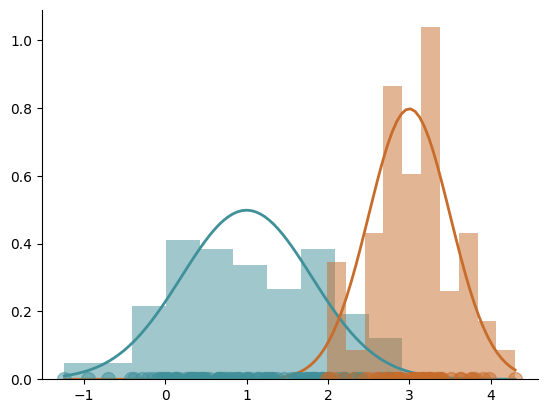

In [5]:
# Visualize the data generated by the two normal distributions
viz([list(data1)]+[list(data2)],mu,sd)

**try to use GMM model to generate data**

In [15]:
# Given the generated data, infer the means and the variances
import numpy as np
data = np.expand_dims(list(data1)+list(data2), axis=1)

## GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, init_params='random_from_data')
gmm.fit(data)

GaussianMixture(init_params='random_from_data', n_components=2)



```
แต่พอมัน แรนด้อม รันอีกรอบ มันก็ไม่เหมือนเดิมละปะ
```


GMM >>> p(x) = 0.74Normal(1.20,1.03)+0.26Normal(3.14,0.43)


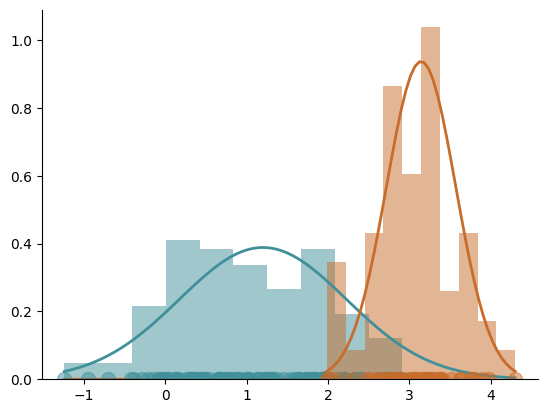

In [16]:
### HW: Complete the code below ###
w1, w2 = gmm.weights_ # π
mu1, mu2 = gmm.means_.flatten() #μ
sd1, sd2 = np.sqrt(gmm.covariances_.flatten()) #σ

print(f'GMM >>> p(x) = %.2fNormal(%.2f,%.2f)+%.2fNormal(%.2f,%.2f)' %(w1,mu1,sd1,w2,mu2,sd2))

# Visualize the data and the inferred norms.
viz([list(data1)] + [list(data2)], [mu1, mu2], [sd1, sd2])
### End of HW ###